In [5]:
class SumDriver(DefaultIP):
    def __init__(self, description):
        super().__init__(description=description)
    
    bindto = ['xilinx.com:histogram::1.0']
    
    @property
    def x(self):
        return self.read(0x10)
    
    @x.setter
    def x(self, value):
        self.write(0x10, value)

In [44]:
import pynq.lib.dma

hisol = pynq.Overlay("./src/histogram/histogram.bit")

# dma = overlay.const_multiply.multiply_dma
# multiply = overlay.const_multiply.multiply

dma = hisol.axi_dma_0
# s = sumol.sum_0


from pynq import Xlnk

xlnk = Xlnk()
in_buffer = xlnk.cma_array(shape=(128,), dtype=np.uint32) 
# our input size is limited by IP core to be 8, and here the buffer size has to be greater than the greatest number in your input array
out_buffer = xlnk.cma_array(shape=(264,), dtype=np.uint32)
# our buffer size should be your output size+inputsize

for i in range(0,4):
    in_buffer[i] = 10;

for j in range(4,5):
    in_buffer[j] = 30;

for j in range(5,6):
    in_buffer[j] = 50;
    
for k in range(6,8):
    in_buffer[k] = 100;

    
dma.sendchannel.transfer(in_buffer)
dma.sendchannel.wait()
dma.recvchannel.transfer(out_buffer)
dma.recvchannel.wait()

inputa = in_buffer[0:8]

print(out_buffer)

result = out_buffer[8:264]

print(result)

[ 10  10  10  10  30  50 100 100   0   0   0   0   0   0   0   0   0   0
   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

<Container object of 3 artists>

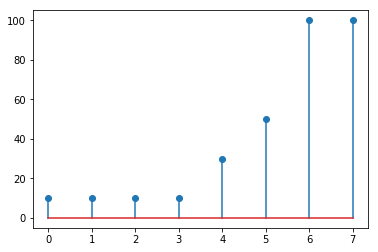

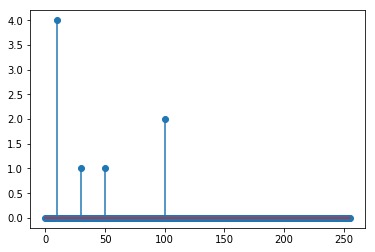

In [45]:
import pylab as py
import scipy as scipy
import matplotlib.pyplot as plt
import scipy.fftpack
import numpy.fft


fig1 = plt.figure()
ax1 = fig1.gca()
plt.stem(inputa)

fig2 = plt.figure()
ax2 = fig2.gca()

plt.stem(result)